## 1. Data Importing and Preprocessing

In [1]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [624]:
import numpy as np

In [765]:
data = pd.read_csv("Data Analyst_ DATASET.csv")

In [21]:
data.shape

(5000, 7)

In [398]:
data.columns

Index(['order_id', 'item_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')


<font  size=4 color = #5F9EA0> Apart from the information given, we might want to know **item price per order**, so that we can understand the value of products on sales. </font>
<font  size=4 color = #5F9EA0> Here, I assume that the 'order amount' only indicates product prices, but not including shipping cost, etc, if this is a case in e-commerce </font>

In [766]:
data['item_price'] = data['order_amount']/data['total_items']

In [474]:
# check for null values
data.isnull().sum()

order_id          0
item_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
item_price        0
dtype: int64

In [475]:
# check for data types
data.dtypes

order_id                  object
item_id                   object
user_id                   object
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
item_price               float64
dtype: object

In [768]:
# change data types
data = data.astype({'order_id': 'object','item_id':'object','user_id':'object'})
data['created_at'] = pd.to_datetime(data['created_at'])

In [769]:
data.dtypes

order_id                  object
item_id                   object
user_id                   object
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
item_price               float64
dtype: object

## 1.2 Check and Remove Outliers

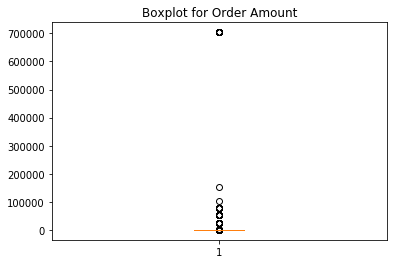

In [749]:
# boxplot to check for outliers
plt.boxplot(data['order_amount'])
plt.title('Boxplot for Order Amount')
plt.show()

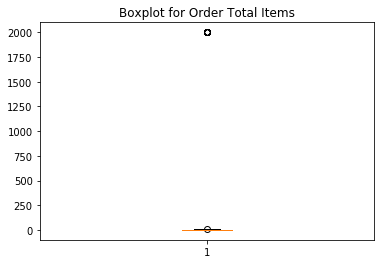

In [750]:
plt.boxplot(data['total_items'])
plt.title('Boxplot for Order Total Items')
plt.show()

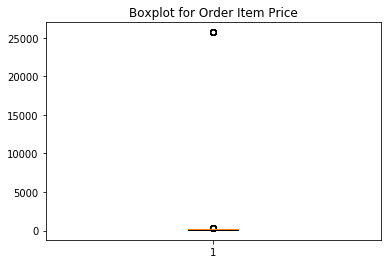

In [751]:
plt.boxplot(data['item_price'])
plt.title('Boxplot for Order Item Price')
plt.show()

<font  size=4 color = #5F9EA0> For both 'order amount' and 'total items' and 'item price', there are outliers </font>

In [414]:
# detect extreme outliers
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)
    return lower_range,upper_range

In [415]:
# extreme outliers in 'order amount'
lower_range,upper_range = outlier_treatment(data.order_amount)
data[(data.order_amount < lower_range) | (data.order_amount > upper_range)]['order_amount'].unique()

array([704000,  25725,  51450, 154350,  77175,   1760,   1408, 102900,
         1086])

In [416]:
# extreme outliers in 'total_items'
lower_range,upper_range = outlier_treatment(data.total_items)
data[(data.total_items < lower_range) | (data.total_items > upper_range)]['total_items'].unique()

array([2000])

In [518]:
# extreme outliers in 'item_price'
lower_range,upper_range = outlier_treatment(data.item_price)
data[(data.item_price < lower_range) | (data.item_price > upper_range)]['item_price'].unique()

array([  352., 25725.])

<font  size=4 color = #5F9EA0> - 9 extreme outliers are detected for 'order amount', out of these 9 outliers, '704000' is too extreme and will have a significant impact on the accuracy and generality of our analysis. </font>

<font  size=4 color = #5F9EA0> - 1 extreme outlier is detected for 'total_items', '2000' </font>

<font  size=4 color = #5F9EA0> - 1 extreme outlier is detected for 'item_price', '25725' </font>

<font  size=4 color = #5F9EA0> - Let us see more detail about thess outliers </font>

In [483]:
data[data['order_amount'] == 704000]

,order_id,item_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0


In [484]:
data[data['total_items'] == 2000]

,order_id,item_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0


<font  size=4 color = #5F9EA0> These two extreme outliers all come from one user_id '607', who purchased 2000 items for each order. This customer must be business customer but not individual customer who wants to purchase for personal use. So we need to seperate our analysis into individual customer part and business customer part. Given the fact that we only have one user who seems to be a business customer in this dataset, our analysis in the following will be analysis about individual customers who buy the products for personal use. </font>
 

In [774]:
# remove data of user '607'
data_one = data[data['user_id'] != 607]

In [488]:
print('There is a total of {} customers'.format(len(data_one['user_id'].unique())),'\n')
print('There is a total of {} items on sales'.format(len(data_one['item_id'].unique())), '\n')
print('Payment methods available are', data_one['payment_method'].unique()[0],',',data_one['payment_method'].unique()[1], 'and',data_one['payment_method'].unique()[2],'\n')
print('Order information between {} and {}'.format(min(data_one['created_at']), max(data_one['created_at'])))

There is a total of 300 customers 

There is a total of 100 items on sales 

Payment methods available are cash , credit_card and debit 

Order information between 2017-03-01 00:08:00 and 2017-03-30 23:55:00


## 2. Data Analysis

## 2.1 AOV Analysis

   <font  size=4 color = #5F9EA0> Equation of AOV Calculation : AOV =  Total Revenvue / Total Number of Orders </font>

In [489]:
# AOV without any customer segmentations
print('Average order value without removing outliers is', round(sum(data_one['order_amount'])/4983,2))

Average order value without removing outliers is 754.09


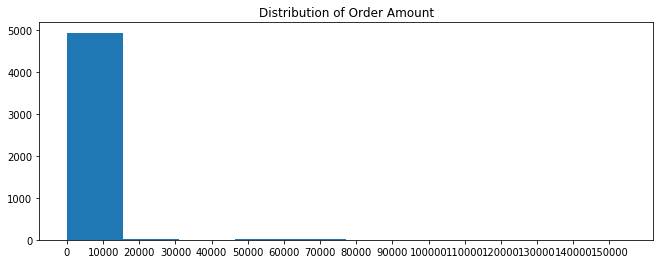

In [467]:
# check the distribution of 'order amount'
plt.figure(figsize = (11,4))
plt.hist(data_one['order_amount'])
plt.title('Distribution of Order Amount')
plt.xticks(range(0,160000,10000))
plt.show()

<font  size=4 color = #5F9EA0> We can see that most of the orders value less than 10000, very few orders value more than 10000. </font>

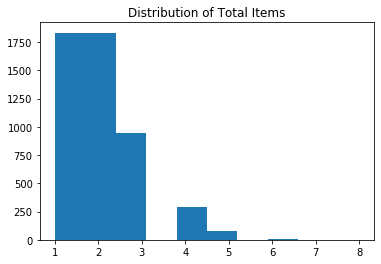

In [465]:
# check the distribution of 'total items'
plt.hist(data_one['total_items'])
plt.title('Distribution of Total Items')
plt.show()

<font  size=4 color = #5F9EA0> Most of the orders contain less than 3 items. </font>

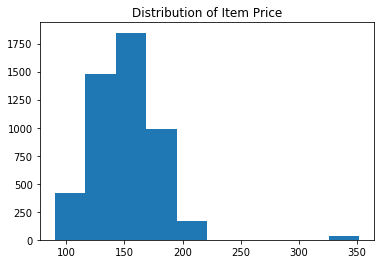

In [517]:
# check the distribution of 'item price per order', here I assume that the order_amount only includes values of items, but not includes shipping costs, etc
plt.hist(data_one[data_one['item_price']!= 25725]['item_price'])
plt.title('Distribution of Item Price')
plt.show()


<font  size=4 color = #5F9EA0> Except that there is an extreme high value product worth more than 25000, most of other products being sold are less than 250. </font>

## 2.1.1 AOV for Different Customer Segments

<font  size=4 color = #5F9EA0> To have better understanding of AOV, I segment customers by 'order amount' and calculate AOVs for different customer segments. </font>


<font  size=4 color = #5F9EA0> (1) Customers who spent less than 500 for an order - **C1** </font>

<font  size=4 color = #5F9EA0> (2) Customers who spent more than 500 but less than 2000 for an order - **C2** </font>

<font  size=4 color = #5F9EA0> (3) Customers who spent more than 2000 for an order - **C3** </font>

In [752]:
# aov for customers who purchase less than 500 for an order
C1 = data_one[data_one['order_amount'] <= 500]

In [545]:
print('more than {} percent of orders worth less than 500'.format(4364/5000*100))

more than 87.28 percent of orders worth less than 500


In [568]:
# aov for orders in C1 category
print('The AOV of C1 categories are', sum(C1['order_amount'])/4364)

The AOV of C1 categories are 260.95944087992666


In [547]:
c1_cnt = pd.DataFrame(C1.groupby('total_items')['order_id'].count()).reset_index()
c1_cnt.rename(columns = {'order_id':'number_of_orders'}, inplace = True)
c1_cnt['percentage'] = c1_cnt['number_of_orders']/4364*100
c1_cnt

,total_items,number_of_orders,percentage
0,1,1811,41.498625
1,2,1803,41.315307
2,3,702,16.086159
3,4,46,1.054079
4,5,2,0.045830


([<matplotlib.axis.XTick at 0x1248b3e90>,
 <a list of 5 Text xticklabel objects>)

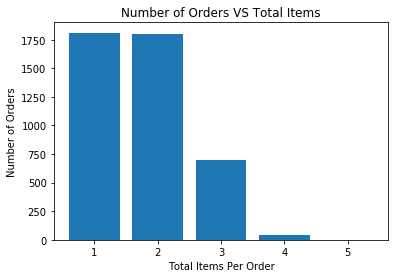

In [753]:
plt.bar(range(5),c1_cnt['number_of_orders'])
plt.ylabel('Number of Orders')
plt.xlabel('Total Items Per Order')
plt.title('Number of Orders VS Total Items')
plt.xticks(range(5),[1,2,3,4,5])

<font  size=4 color = #5F9EA0> - Customers fall into C1 category include **no more than 5 items** each time. </font>

<font  size=4 color = #5F9EA0> - More than **83%** of customers in C1 category purchase less than 2 items at a time. </font>

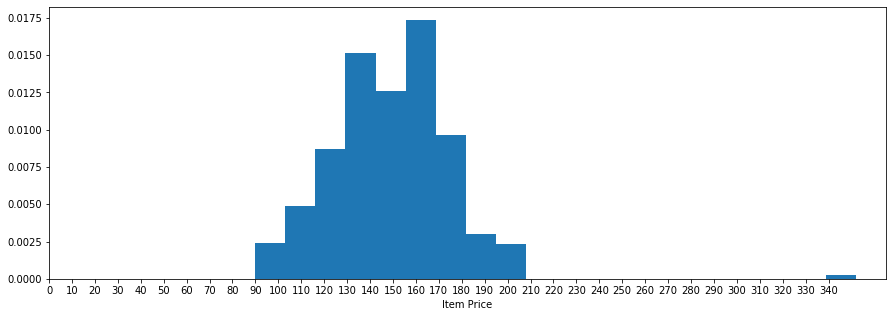

In [585]:
## see how item price of C1 orders distribute
plt.figure(figsize=(15,5))
plt.hist(C1['item_price'], density = True, bins = 20)
plt.xlabel('Item Price')
plt.xticks(range(0,350,10))
plt.show()

<font  size=4 color = #5F9EA0> - Item price in C1 category mostly ranges between **130 - 140** and **170 - 180** </font>

In [754]:
# Orders worth between 500 and 2000
C2 = data_one[(data_one['order_amount']>=500)&(data_one['order_amount']<2000)]

In [603]:
## aov for orders in C2 category
print('The AOV of C2 categories are', sum(C2['order_amount'])/573)

The AOV of C2 categories are 619.5689354275742


In [755]:
print('About than {} percent of orders worth more than 500 and less than 2000'.format(round(573/5000*100,2)))

About than 11.46 percent of orders worth more than 500 and less than 2000


In [565]:
c2_cnt = pd.DataFrame(C2.groupby('total_items')['order_id'].count()).reset_index()
c2_cnt.rename(columns = {'order_id':'number_of_orders'}, inplace = True)
c2_cnt['percentage'] = c2_cnt['number_of_orders']/573*100
c2_cnt

,total_items,number_of_orders,percentage
0,2,13,2.268761
1,3,230,40.139616
2,4,246,42.931937
3,5,75,13.089005
4,6,8,1.396161
5,8,1,0.174520


([<matplotlib.axis.XTick at 0x122f55a50>,
 <a list of 6 Text xticklabel objects>)

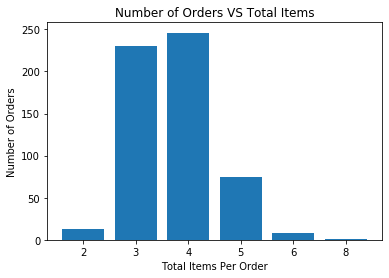

In [756]:
plt.bar(range(6),c2_cnt['number_of_orders'])
plt.ylabel('Number of Orders')
plt.xlabel('Total Items Per Order')
plt.title('Number of Orders VS Total Items')
plt.xticks(range(6),[2,3,4,5,6,8])

<font  size=4 color = #5F9EA0> - More than **97%** of customers in C2 category purchase **more than 2 items** at a time. </font>

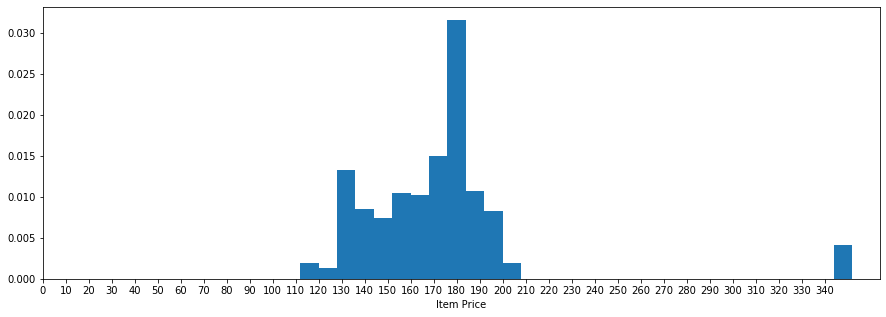

In [584]:
# see how item price of C2 orders distribute
plt.figure(figsize=(15,5))
plt.hist(C2['item_price'], density = True, bins = 30)
plt.xlabel('Item Price')
plt.xticks(range(0,350,10))
plt.show()

<font  size=4 color = #5F9EA0> - Item price in C2 category mostly range between **180 - 185** </font>

In [757]:
# Orders worth more than 2000
C3 = data_one[data_one['order_amount'] > 2000]

In [602]:
# aov of C3 category
print('The AOV of C3 categories are', sum(C3['order_amount'])/46)

The AOV of C3 categories are 49213.04347826087


In [758]:
print('About {} percent of orders worth more than 2000'.format(round(46/5000*100,2)))

About 0.92 percent of orders worth more than 2000


In [595]:
c3_cnt = pd.DataFrame(C3.groupby('total_items')['order_id'].count()).reset_index()
c3_cnt.rename(columns = {'order_id':'number_of_orders'}, inplace = True)
c3_cnt['percentage'] = c3_cnt['number_of_orders']/46*100
c3_cnt

,total_items,number_of_orders,percentage
0,1,19,41.304348
1,2,16,34.782609
2,3,9,19.565217
3,4,1,2.173913
4,6,1,2.173913


([<matplotlib.axis.XTick at 0x124254410>,
 <a list of 5 Text xticklabel objects>)

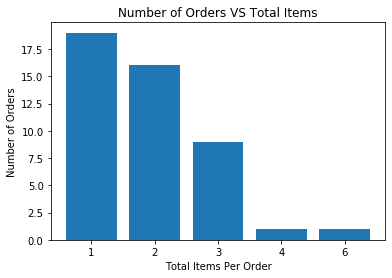

In [759]:
plt.bar(range(5),c3_cnt['number_of_orders'])
plt.ylabel('Number of Orders')
plt.xlabel('Total Items Per Order')
plt.title('Number of Orders VS Total Items')
plt.xticks(range(5),[1,2,3,4,6])

<font  size=4 color = #5F9EA0> - More than **75%** of customers in C3 category purchase less than 2 items at a time. </font>

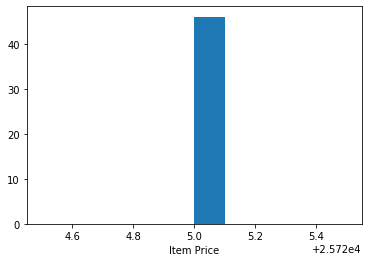

In [760]:
# see how item price of C2 orders distribute
plt.hist(C3['item_price'])
plt.xlabel('Item Price')
plt.show()

<font  size=4 color = #5F9EA0> - For orders in C3 category, the reason why the order amount is high because the item price is high, but not because the customers tend to buy more items. </font>

## 2.1.2 Analyze Daily AOV Trend in a Month

In [775]:
data_one.created_at = pd.Series(data_one.created_at.map(lambda x: x.strftime('%Y-%m-%d')))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [776]:
aov_trend = pd.DataFrame(data_one.groupby('created_at')['order_amount'].sum())
aov_trend['number_of_orders'] = pd.Series(data_one.groupby('created_at')['order_id'].count())
aov_trend['daily_aov'] = aov_trend['order_amount']/aov_trend['number_of_orders']

([<matplotlib.axis.XTick at 0x126bd0f50>,
 <a list of 30 Text xticklabel objects>)

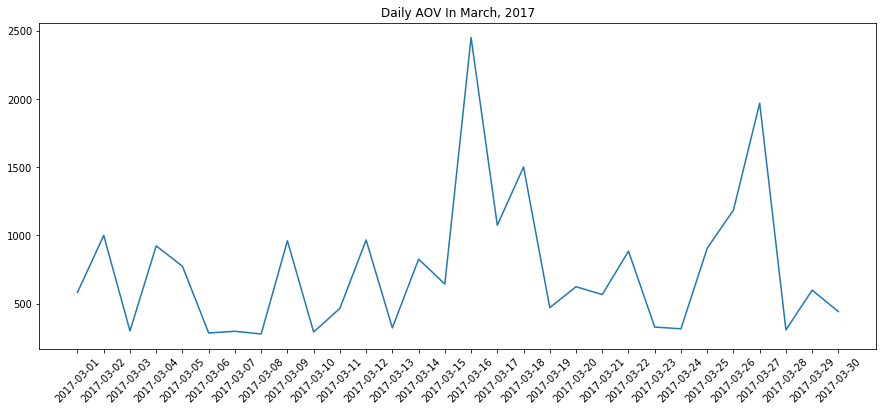

In [778]:
plt.figure(figsize = (15,6))
plt.plot(range(30), aov_trend['daily_aov'])
plt.title('Daily AOV In March, 2017')
plt.xticks(range(30), aov_trend.index, rotation=45)

<font  size=4 color = #5F9EA0> Based on the line chart above, the **AOV** line fluctuates in a **2-4 days** time interval within a range between 300 - 1000, except for some days when extremely big orders came. This indicate that most customers shop for every 2-4 days. </font>

In [779]:
purchase_freq = pd.DataFrame(data_one.groupby('user_id')['order_id'].count()).reset_index()
purchase_freq.rename(columns = {'order_id':'purchase_frequency'}, inplace = True)

(array([ 7., 19., 40., 65., 55., 41., 32., 28.,  9.,  4.]),
 array([ 7. ,  9.1, 11.2, 13.3, 15.4, 17.5, 19.6, 21.7, 23.8, 25.9, 28. ]),
 <a list of 10 Patch objects>)

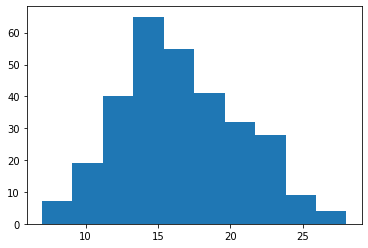

In [780]:
# see how purchase freqency distributes
plt.hist(purchase_freq['purchase_frequency'])

<font  size=4 color = #5F9EA0> The purchase frequency barplot below both indicate that about **50%** of customers shop for every **2 days** withtin a month </font>

## 2.1.3 Modelling - Linear Regression

<font  size=4 color = #5F9EA0> Through EDA, we found that improving 'Order Amount' by selling more high-value products or sell more items per order can help with improving AOV. Now I built a linear regression model to validate the findings. </font>

In [787]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [784]:
Y = data_one['order_amount']
X = data_one[['total_items','item_price']]

In [788]:
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:           order_amount   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              8867.
Date:                Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                        12:47:01   Log-Likelihood:                         -46084.
No. Observations:                4983   AIC:                                  9.217e+04
Df Residuals:                    4981   BIC:                                  9.218e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<font  size=4 color = #5F9EA0> The result table shows that both 'Total Items' and 'Item Price' have significantly **positive** impacts on 'Order Amount'. The findings are validated. </font>

## 2.1.4 Insights and Recommendations

<font  size=2 color = #5F9EA0> AOV for C1: 260.96;    </font>
<font  size=2 color = #5F9EA0>  AOV for C2: 619.57;    </font>
<font  size=2 color = #5F9EA0>  AOV for C3: 49213.04 </font>

<font  size=4 color = black> **Insights about AOV** </font>

<font  size=3 color = black> &#x25A0; AOV for C2 category is higher than AOV for C1 because C2 customers tend to buy more items than C1 customers at a time, given that the item prices in C1 and C2 category are very close. </font>

<font  size=3 color = black> &#x25A0; AOV for C3 category is higher than AOV for C1 because C3 customers tend to buy more expensive items, given that C3 customers do not buy more items at a time than C1 customers. </font>

<font  size=4 color = black> **Recommendations about Improving AOV**</font>

<font  size=3 color = black> &#x25A0; Encourage customers to buy more items each time. Common strategies: Cross-selling, upselling, volume discounts, free shipping, coupons, donations and return policy, etc. </font>


<font  size=3 color = black> &#x25A0; Provide customers with more high-value products and encourage customers to buy more high-value products. </font>

<font  size=3 color = black> &#x25A0; Sending coupons or product promotions through emails or other promotion channels to attract customers to come back to shop more frequently. </font>


## 2.2  Payment Method Analysis

## 2.2.1 Customer Payment Method Preference

In [790]:
payment_cnt = pd.DataFrame(data.groupby('payment_method')['order_id'].count())

([<matplotlib.axis.XTick at 0x1a2aaa8610>,
 <a list of 3 Text xticklabel objects>)

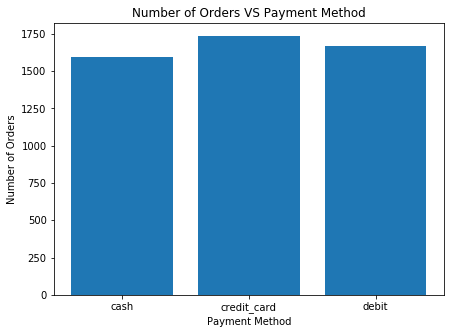

In [795]:
plt.figure(figsize = (7,5))
plt.bar(range(3),payment_cnt['order_id'])
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.title('Number of Orders VS Payment Method')
plt.xticks(range(3),payment_cnt.index)

<font  size=4 color = #5F9EA0> Number of orders for three payment method are close, while number of orders paid by credit card are slightly more than other two payment methods. </font>

In [789]:
payment_pre = pd.DataFrame(data.groupby('user_id')['order_id'].count()).reset_index()
payment_pre.rename(columns = {'order_id': 'total_orders'}, inplace = True)

In [697]:
cash = data[data['payment_method'] == 'cash']
credit = data[data['payment_method'] == 'credit_card']
debit = data[data['payment_method'] == 'debit']

In [798]:
print('{} percent of orders are paid by cash'.format(round(cash.shape[0]/5000*100),2), '\n')
print('{} percent of orders are paid by credit card'.format(round(credit.shape[0]/5000*100),2), '\n')
print('{} percent of orders are paid by debit card'.format(round(debit.shape[0]/5000*100),2), '\n')

32 percent of orders are paid by cash 

35 percent of orders are paid by credit card 

33 percent of orders are paid by debit card 



In [799]:
cash_pre = pd.DataFrame(cash.groupby('user_id')['order_id'].count()).reset_index()
cash_pre.rename(columns = {'order_id': 'order_num_pay_by_cash'}, inplace = True)

credit_pre = pd.DataFrame(credit.groupby('user_id')['order_id'].count()).reset_index()
credit_pre.rename(columns = {'order_id': 'order_num_pay_by_credit'}, inplace = True)

debit_pre = pd.DataFrame(debit.groupby('user_id')['order_id'].count()).reset_index()
debit_pre.rename(columns = {'order_id': 'order_num_pay_by_debit'}, inplace = True)

In [800]:
# merge three dataframes
payment_pre = pd.merge(payment_pre, cash_pre, how = 'left', on = 'user_id')
payment_pre = pd.merge(payment_pre, credit_pre, how = 'left', on = 'user_id')
payment_pre = pd.merge(payment_pre, debit_pre, how = 'left', on = 'user_id')
payment_pre = payment_pre.fillna(0)
payment_pre

,user_id,total_orders,order_num_pay_by_cash,order_num_pay_by_credit,order_num_pay_by_debit
0,607,17,0.0,17,0.0
1,700,16,6.0,6,4.0
2,701,13,2.0,6,5.0
3,702,13,2.0,6,5.0
4,703,16,6.0,5,5.0
...,...,...,...,...,...
296,995,15,6.0,3,6.0
297,996,21,6.0,9,6.0
298,997,13,2.0,2,9.0
299,998,9,2.0,5,2.0


In [803]:
payment_pre['cash_ratio'] = payment_pre['order_num_pay_by_cash']/payment_pre['total_orders']
payment_pre['credit_ratio'] = payment_pre['order_num_pay_by_credit']/payment_pre['total_orders']
payment_pre['debit_ratio'] = payment_pre['order_num_pay_by_debit']/payment_pre['total_orders']

payment_ratio = payment_pre[['user_id','cash_ratio','credit_ratio','debit_ratio']]
payment_ratio

payment_ratio['preferred'] = payment_ratio.iloc[:,1:3].max(axis = 1)

payment_ratio['cash_prefer'] = np.nan
payment_ratio['credit_prefer'] = np.nan
payment_ratio['debit_prefer'] = np.nan

payment_ratio

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,user_id,cash_ratio,credit_ratio,debit_ratio,preferred,cash_prefer,credit_prefer,debit_prefer
0,607,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
1,700,0.375000,0.375000,0.250000,0.375000,NaN,NaN,NaN
2,701,0.153846,0.461538,0.384615,0.461538,NaN,NaN,NaN
3,702,0.153846,0.461538,0.384615,0.461538,NaN,NaN,NaN
4,703,0.375000,0.312500,0.312500,0.375000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
296,995,0.400000,0.200000,0.400000,0.400000,NaN,NaN,NaN
297,996,0.285714,0.428571,0.285714,0.428571,NaN,NaN,NaN
298,997,0.153846,0.153846,0.692308,0.153846,NaN,NaN,NaN
299,998,0.222222,0.555556,0.222222,0.555556,NaN,NaN,NaN


In [804]:
for i in range(301):
    if payment_ratio['preferred'].iloc[i] == payment_ratio['cash_ratio'].iloc[i]:
        payment_ratio['cash_prefer'].iloc[i] = 1
    else:
        payment_ratio['cash_prefer'].iloc[i] = 0
    if payment_ratio['preferred'].iloc[i] == payment_ratio['credit_ratio'].iloc[i]:
        payment_ratio['credit_prefer'].iloc[i] = 1
    else:
        payment_ratio['credit_prefer'].iloc[i] = 0
    if payment_ratio['preferred'].iloc[i] == payment_ratio['debit_ratio'].iloc[i]:
        payment_ratio['debit_prefer'].iloc[i] = 1
    else:
        payment_ratio['debit_prefer'].iloc[i] = 0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [805]:
print('{} percent of customers prefer to pay by cash'.format(round(sum(payment_ratio['cash_prefer'])/301*100),2))
print('{} percent of customers prefer to pay by credit card'.format(round(sum(payment_ratio['credit_prefer'])/301*100),2))
print('{} percdnt of customers prefer to pay by debit card'.format(round(sum(payment_ratio['debit_prefer'])/301*100),2))

52 percent of customers prefer to pay by cash
59 percent of customers prefer to pay by credit card
17 percdnt of customers prefer to pay by debit card


<font  size=4 color = #5F9EA0> **Credit Card** is the most popular payment method, **Cash** comes second, and **Debit Card** is the least popular one. </font>
<font  size=1 color = #5F9EA0>(Note that the percentage does not add up to 1 because one customer can have more than 1 favorite payment method)</font>

## 2.2.2 Total Revenue of Three Payment Method

([<matplotlib.axis.XTick at 0x1a2adb9910>,
 <a list of 3 Text xticklabel objects>)

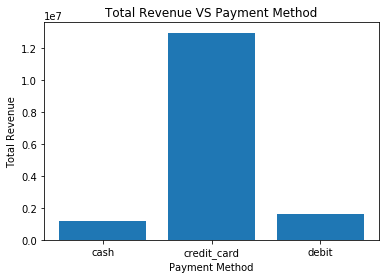

In [808]:
payment_val = pd.DataFrame(data.groupby('payment_method')['order_amount'].sum())

plt.bar(range(3),payment_val['order_amount'])
plt.title('Total Revenue VS Payment Method')
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')
plt.xticks(range(3),payment_val.index)

<font  size=4 color = #5F9EA0> Most of the revenue made is paid by **Credit Card**. </font>

## 2.2.3 Insight and Recommendations

<font  size=4 color = black> **Insights about Payment Method** </font>

<font  size=3 color = black> &#x25A0; **Credit Card** is the most popular payment method, **Cash** comes second, and **Debit Card** is the least popular one. </font>

<font  size=3 color = black> &#x25A0; Most of the revenue made is paid by **Credit Card**. </font>

<font  size=4 color = black> **Recommendations about Payment Method** </font>

<font  size=3 color = black> &#x25A0; The payment methods provided are a bit old-school and limites, adding new payment methods such as **e-wallets** can improve revenue, according to researches. </font>

<font  size=4 color = black> **Reference:**</font>

<font  size=4 color = black> North America—Credit cards top the list of commonly used payment methods, at **34%** in 2018, but will fall to second place in 2022 **(27%)**, after eWallets **(33%)**. (https://home.bluesnap.com/snap-center/blog/payment-method-statistics/) </font>


## 2.3 Retention Analysis

<font  size=4 color = #5F9EA0> Retention analysis is calculated over a period of time and serves as a vital supplement to new-user acquisition metrics. </font>

In [810]:
retention = data.copy()
retention

,order_id,item_id,user_id,order_amount,total_items,payment_method,created_at,item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:00,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:00,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:00,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:00,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:00,117.0
4997,4998,56,867,351,3,cash,2017-03-19 05:42:00,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:00,177.0


## 2.3.1 Monthly Retention Rate

In [812]:
first_transaction = pd.DataFrame(retention.groupby('user_id')['created_at'].min()).reset_index()
first_transaction.rename(columns = {'created_at':'first_transaction_date'}, inplace = True)

last_transaction = pd.DataFrame(retention.groupby('user_id')['created_at'].max()).reset_index()
last_transaction.rename(columns = {'created_at':'last_transaction_date'}, inplace = True)

retention = pd.merge(first_transaction, last_transaction, how = 'inner', on = 'user_id')
retention

,user_id,first_transaction_date,last_transaction_date
0,607,2017-03-02 04:00:00,2017-03-28 04:00:00
1,700,2017-03-07 18:00:00,2017-03-30 23:55:00
2,701,2017-03-01 07:14:00,2017-03-27 13:54:00
3,702,2017-03-01 18:39:00,2017-03-29 07:10:00
4,703,2017-03-02 06:27:00,2017-03-29 10:25:00
...,...,...,...
296,995,2017-03-03 11:48:00,2017-03-28 06:53:00
297,996,2017-03-01 13:27:00,2017-03-29 05:48:00
298,997,2017-03-02 04:00:00,2017-03-26 16:40:00
299,998,2017-03-04 23:58:00,2017-03-28 09:56:00


In [350]:
# number of customers at the start of the month
start = retention[retention['first_transaction_date'] == '2017-03-01']

# number of customers remaining at the end of the month
end = start[start['last_transaction_date'] == '2017-03-30']

,user_id,first_transaction_date,last_transaction_date,datediff
225,924,2017-03-01,2017-03-18,16
174,873,2017-03-01,2017-03-21,20
117,816,2017-03-01,2017-03-22,21
228,927,2017-03-01,2017-03-23,21
31,730,2017-03-01,2017-03-24,22
...,...,...,...,...
158,857,2017-03-01,2017-03-30,29
60,759,2017-03-01,2017-03-30,29
188,887,2017-03-01,2017-03-30,29
9,708,2017-03-01,2017-03-30,29


In [814]:
start.shape

(131, 4)

In [815]:
end.shape

(46, 4)

In [818]:
# monthly retention rate 
print('the monthly retention rate is', round(46/131,2))

the monthly retention rate is 0.35


<font  size=4 color = #5F9EA0> A retention rate of 0.35 means that for out of 100 customers, only 35 of them will come back after one month. </font>

## 2.3.2  Weekly Retention Rate

In [819]:
data.created_at = pd.Series(data.created_at.map(lambda x: x.strftime('%Y-%m-%d')))

user_1st = pd.DataFrame(data[data['created_at'] == '2017-03-01']['user_id'])
user_1st.rename(columns = {'0':'user_id'}, inplace = True)

In [825]:
user_1st_detail = pd.merge(user_1st, data, on = 'user_id')

user_7th = user_1st_detail[user_1st_detail['created_at'] == '2017-03-07']

print("There are {} users on 2017-03-01.".format(len(user_1st['user_id'].unique())), '\n')

print("There are {} users on 2017-03-07.".format(len(user_7th['user_id'].unique())))
print("The retention rate on 2017-03-07 is {}.".format(round(len(user_7th['user_id'].unique())/131,4)), '\n')

user_14th = user_1st_detail[user_1st_detail['created_at'] == '2017-03-14']
print("There are {} users on 2017-03-14.".format(len(user_14th['user_id'].unique())))
print("The retention rate on 2017-03-14 is {}.".format(round(len(user_14th['user_id'].unique())/131,4)), '\n')

user_21th = user_1st_detail[user_1st_detail['created_at'] == '2017-03-21']
print("There are {} users on 2017-03-21.".format(len(user_21th['user_id'].unique())))
print("The retention rate on 2017-03-21 is {}.".format(round(len(user_21th['user_id'].unique())/131,4)), '\n')

user_30th = user_1st_detail[user_1st_detail['created_at'] == '2017-03-30']
print("There are {} users on 2017-03-30.".format(len(user_30th['user_id'].unique())))
print("The retention rate on 2017-03-30 is {}.".format(round(len(user_30th['user_id'].unique())/131,4)))

There are 131 users on 2017-03-01. 

There are 60 users on 2017-03-07.
The retention rate on 2017-03-07 is 0.458. 

There are 57 users on 2017-03-14.
The retention rate on 2017-03-14 is 0.4351. 

There are 59 users on 2017-03-21.
The retention rate on 2017-03-21 is 0.4504. 

There are 46 users on 2017-03-30.
The retention rate on 2017-03-30 is 0.3511.


([<matplotlib.axis.XTick at 0x123d42410>,
 <a list of 4 Text xticklabel objects>)

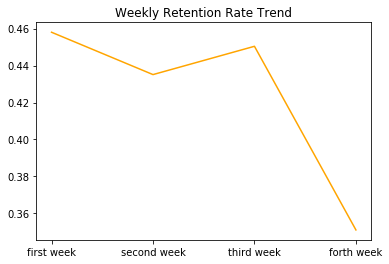

In [746]:
plt.title('Weekly Retention Rate Trend')
plt.plot(range(4), [0.458, 0.4351, 0.4504, 0.3511], color = 'orange')
plt.xticks(range(4),['first week', 'second week', 'third week', 'forth week'])

## 2.3.3  Insights and Recommendations

<font  size=4 color = black> **Insights about Retention** </font>

<font  size=3 color = black> &#x25A0; The monthly retention rate is 0.35, which is relatively low. </font>

<font  size=3 color = black> &#x25A0; Weekly retention rate drops drastically from the third week to the forth week.. </font>

<font  size=4 color = black> **Recommendations about Retention** </font>

<font  size=3 color = black> &#x25A0; Methods need to be taken to improve retention rate, especially at the third week in a month interval. Common strategies: email marketing, offer reward program, customer experience customization, etc. Which strategy to take needs more background knowledge about the company and the business context as well. </font>
